**Ingeniería de atributos y selección de variables**

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargar el archivo con Pandas
# URL del archivo raw en GitHub
url = "https://raw.githubusercontent.com/iosonobenjamin/Proyecto-Data-Science/main/Airline%20Dataset.csv"
df = pd.read_csv(url)

**Creación variables sintéticas adicionales que permitan mejorar el desempeño del modelo de ML, puedes usar algunas de las siguientes técnicas**

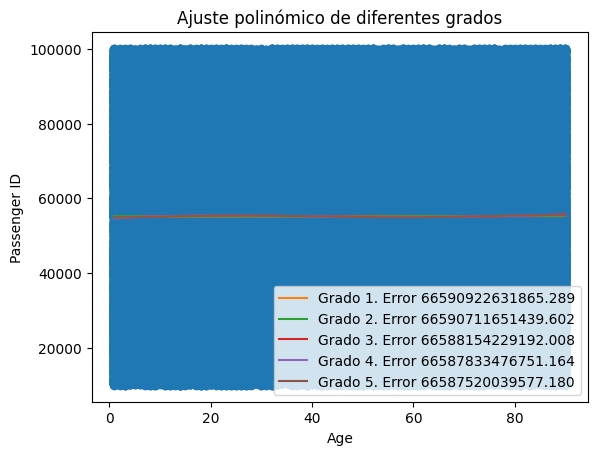

In [3]:
# Columnas relevantes seleccionadas
x = df['Age'].values
y = df['Passenger ID'].values

# Calcular ajustes para diferentes grados de polinomios
sols = {}
for grado in range(1, 6):
    z = np.polyfit(x, y, grado, full=True)
    sols[grado] = z

# Pintar datos
plt.plot(x, y, 'o')

# Pintar curvas de ajuste
xp = np.linspace(min(x), max(x), 100)
for grado, sol in sols.items():
    coefs, error, *_ = sol
    p = np.poly1d(coefs)
    plt.plot(xp, p(xp), "-", label=f"Grado {grado}. Error {error[0]:.3f}")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Passenger ID")
plt.title("Ajuste polinómico de diferentes grados")
plt.show()


Los errores asociados a cada grado son números muy grandes, lo que sugiere que el ajuste polinómico no es adecuado para estos datos. Podría ser útil explorar otras técnicas de ajuste o considerar si los datos siguen una relación polinómica en primer lugar

**Aplicacion de PCA**

In [4]:
# Seleccionar las columnas numéricas para el PCA
numeric_columns = df.select_dtypes(include=[np.number])

In [5]:
# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

In [6]:
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [7]:
# Obtener las cargas de los componentes
loadings = pd.DataFrame(pca.components_, columns=numeric_columns.columns, index=['PC1', 'PC2'])

In [8]:
# Variables más relevantes (mayor carga absoluta en cada componente)
most_relevant_variables = loadings.abs().idxmax()

print("Cargas de los componentes:")
print(loadings)
print("\nVariables más relevantes:")
print(most_relevant_variables)

Cargas de los componentes:
     Passenger ID       Age
PC1     -0.707107 -0.707107
PC2     -0.707107  0.707107

Variables más relevantes:
Passenger ID    PC2
Age             PC1
dtype: object


**Analisis de resultado**

**Cargas de los Componentes:**
El Componente Principal 1 (PC1) muestra una fuerte carga negativa tanto para la variable “Passenger ID” como para la variable “Age”. Esto significa que estas dos variables están altamente correlacionadas en el primer componente.
El Componente Principal 2 (PC2) tiene una carga negativa para “Passenger ID” y una carga positiva para “Age”.
**Variables más Relevantes:**
En el PC1, la variable más relevante es “Age” (con una carga negativa). Esto sugiere que la edad de los pasajeros es un factor importante en este componente.
En el PC2, la variable más relevante es “Passenger ID” (con una carga negativa). Esto indica que la identificación de los pasajeros también influye en este componente.

En resumen, el PCA ha agrupado las variables originales en dos componentes principales. El PC1 parece estar relacionado con la edad de los pasajeros, mientras que el PC2 está influenciado por la identificación de los pasajeros. Estos resultados pueden ayudarte a comprender mejor la estructura de tus datos y a identificar las variables más influyentes para futuros análisis o modelos de Machine Learning

**Índice de Calinski-Harabasz**

El DBI es una métrica utilizada para evaluar la calidad de una partición en un conjunto de datos en clasificación automática. Mide tanto la separación entre los clústeres como la cohesión dentro de cada clúster. Un valor más bajo del DBI indica una mejor agrupación.

In [9]:
# Seleccionar las columnas relevantes para el análisis, de acuerdo con los cluster presentados en la Segunda Pre Entrega
pilots_data = df[['Pilot Name', 'Flight Status']]

In [10]:
# Codificar las etiquetas categóricas (Flight Status) en valores numéricos utilizando one-hot encoding
pilots_data = pd.get_dummies(pilots_data, columns=['Flight Status'])

In [11]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pilots_data.drop('Pilot Name', axis=1))

In [12]:
# Aplicar el algoritmo K-means
n_clusters = 4  # Definir el número de clústeres
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
pilots_data['Cluster'] = kmeans.fit_predict(scaled_data)

Utilizamos el algoritmo KMeans para agrupar los datos en diferentes números de clusters.

In [13]:
# Calcular el índice DB
db_index = davies_bouldin_score(scaled_data, pilots_data['Cluster'])
print(f"Índice de Davies-Bouldin: {db_index:.3f}")


Índice de Davies-Bouldin: 0.000


El Índice de Davies-Bouldin (DB) es una métrica utilizada para evaluar la calidad de los clústeres en un conjunto de datos. Cuanto más bajo sea el valor del DB, mejor será la agrupación. 

Resultado:

Un valor de 0.000 indica que los clústeres están muy bien separados y son altamente coherentes. En otras palabras, los puntos dentro de cada clúster están cerca entre sí y lejos de los puntos de otros clústeres.
Esto sugiere que el algoritmo de agrupamiento utilizado K-means ha logrado una partición muy efectiva de los datos.
Sin embargo, ten en cuenta que un DB de cero no siempre es posible o deseable. En algunos casos, podría indicar que los datos son demasiado fáciles de agrupar o que el algoritmo está sobreajustando.
En resumen, un DB de 0.000 es un excelente resultado y sugiere que los clústeres son de alta calidad.

Calculamos el índice DB para cada número de clusters.

El índice DB mide la separación entre los clusters y la cohesión dentro de cada cluster. Valores más bajos indican una mejor agrupación.

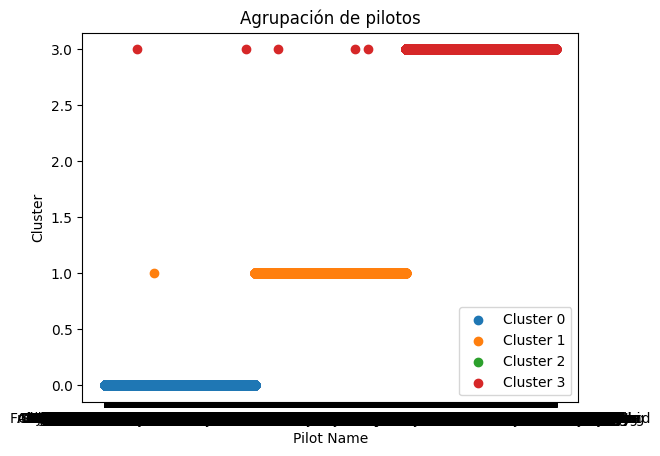

In [14]:
# Visualizar los resultados
for cluster in range(n_clusters):
    cluster_data = pilots_data[pilots_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Pilot Name'], cluster_data['Cluster'], label=f'Cluster {cluster}')

plt.xlabel('Pilot Name')
plt.ylabel('Cluster')
plt.title('Agrupación de pilotos')
plt.legend()
plt.show()

En este código:

Hemos calculado el DBI utilizando davies_bouldin_score.

La visualización muestra los pilotos agrupados en diferentes clústeres.